In [1]:
import chiqed
from chiqed import *

# nBW Pair Production

### nBW: rate

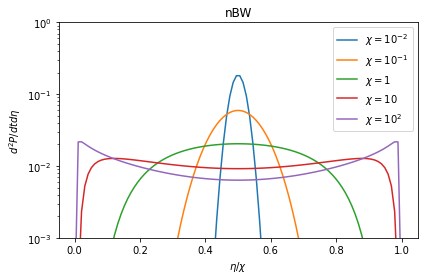

In [2]:
eps=1e-3
xlst = np.linspace(eps, 1-eps,100)
y = d2Pdeta(1e-2,1e-2*xlst)
plt.plot(xlst, y/np.sum(y), label=r'$\chi=10^{-2}$')
y = d2Pdeta(1e-1,1e-1*xlst)
plt.plot(xlst, y/np.sum(y), label=r'$\chi=10^{-1}$')
y = d2Pdeta(1e0,1e0*xlst)
plt.plot(xlst, y/np.sum(y), label=r'$\chi=1$')
y = d2Pdeta(1e1,1e1*xlst)
plt.plot(xlst, y/np.sum(y), label=r'$\chi=10$')
y = d2Pdeta(1e2,1e2*xlst)
plt.plot(xlst, y/np.sum(y), label=r'$\chi=10^2$')
plt.xlabel(r'$\eta/\chi$')
plt.ylabel(r'$d^2P/dtd\eta$')
plt.title(r'nBW')
plt.yscale('log')
plt.ylim([1e-3,1])
plt.legend()
plt.tight_layout()
plt.show()

### nBW: Effectiveness of Direct Sampling

In [3]:
# pair emission
# get efficiency of rejection method for different chi values
ndraws = int(3e2);
effdim = 15;
effmc_smpl = np.zeros(effdim);
effmc_th = np.zeros(effdim);
chilst = np.logspace(-1,3,effdim);
for i in trange(effdim):
    chi = chilst[i]
    # MC
    _,effmc_smpl[i] = pair_aux(chi,ndraws);

    # theory
    etalst = np.linspace(1e-3,chi-1e-3);
    dP1 = d2Pdeta(chi,etalst);
    nrm1 = np.trapz(dP1,etalst/chi);
    effmc_th[i] = nrm1/np.max(dP1);

100%|██████████| 15/15 [00:17<00:00,  1.19s/it]


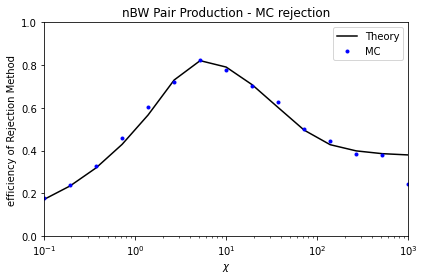

In [4]:
# plot
plt.plot(chilst,effmc_th,'-k', label=r'Theory')
plt.plot(chilst,effmc_smpl,'.b', label=r'MC')
plt.xscale('log')
plt.xlim([np.min(chilst),np.max(chilst)])
plt.ylim([0,1])
plt.xlabel('$\chi$')
plt.ylabel('efficiency of Rejection Method')
plt.title('nBW Pair Production - MC rejection');
plt.legend()
plt.tight_layout()
plt.show()

# nCS Photon Emission

nCS cannot be sampled using the Rejection method (since the function goes to infinity as $\chi/\eta \rightarrow 0$). Instead one should use the inverse transform method or equivalent.

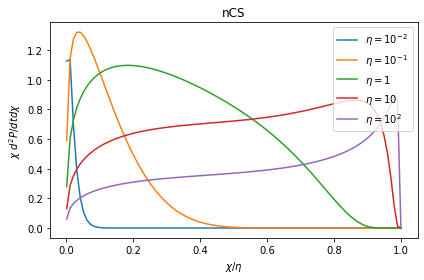

In [5]:
eps=1e-3
xlst = np.linspace(eps, 1-eps,100)
plt.plot(xlst, xlst*d2Pdchi(1e-2,1e-2*xlst), label=r'$\eta=10^{-2}$')
plt.plot(xlst, xlst*d2Pdchi(1e-1,1e-1*xlst), label=r'$\eta=10^{-1}$')
plt.plot(xlst, xlst*d2Pdchi(1e0,1e0*xlst), label=r'$\eta=1$')
plt.plot(xlst, xlst*d2Pdchi(1e1,1e1*xlst), label=r'$\eta=10$')
plt.plot(xlst, xlst*d2Pdchi(1e2,1e2*xlst), label=r'$\eta=10^2$')
plt.xlabel(r'$\chi/\eta$')
plt.ylabel(r'$\chi~d^2P/dtd\chi$')
plt.title(r'nCS')
plt.legend()
plt.tight_layout()
plt.show()

### nCS: Effectiveness of Direct Sampling

In [10]:
# photon emission
# get efficiency of rejection method for different eta values
ndraws = int(3e2);
effdim = 15;
effmc_smpl = np.zeros(effdim);
effmc_th = np.zeros(effdim);
etalst = np.logspace(-1,3,effdim);
for i in trange(effdim):
    eta = etalst[i]
    # MC
    _,effmc_smpl[i] = photon_aux(eta,ndraws);

    # theory
    chilst = np.linspace(1e-3,eta-1e-3);
    dP1 = chilst*d2Pdchi(eta,chilst);
    nrm1 = np.trapz(dP1,chilst/eta);
    effmc_th[i] = nrm1/np.max(dP1);

 93%|█████████▎| 14/15 [00:15<00:01,  1.70s/it]/Users/oscaramaro/Desktop/chiqed-main/chiqed.py:77: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return 1/eta * ( (1-csi+1/(1-csi)) * kv(2/3,chitil) - quad(lambda x: kv(1/3,x), chitil, np.inf)[0] );
100%|██████████| 15/15 [00:20<00:00,  1.34s/it]


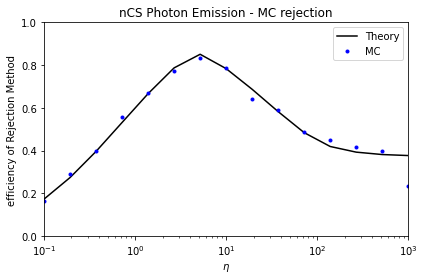

In [11]:
# plot
plt.plot(etalst,effmc_th,'-k', label=r'Theory')
plt.plot(etalst,effmc_smpl,'.b', label=r'MC')
plt.xscale('log')
plt.xlim([np.min(etalst),np.max(etalst)])
plt.ylim([0,1])
plt.xlabel('$\eta$')
plt.ylabel('efficiency of Rejection Method')
plt.title('nCS Photon Emission - MC rejection');
plt.legend()
plt.tight_layout()
plt.show()

For both nBW and nCS (times eta), the highest efficiency of the rejection method will occur at the chi (eta) value where the shape of the rate is closer to a rectangle.